# King County Housing Data Analysis
**Project Goal:** Exploratory Data Analysis (EDA) on housing prices based on location, size, and age.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load data
file_path = '/Users/I767484/programming_LAB/dhow_ScientificProgrammingLab/EDA_Project/KC_housing_data.csv'
df = pd.read_csv(file_path)

# cleaning data
df = df[df['price'] > 0]

print("Data loaded successfully!")

Data loaded successfully!


# Phase 1: Market Timing Analysis
**Question:** When is the best time to buy or sell a property in King County?

To answer this, we analyze the house prices based on the **month** they were sold. 
* **Best time to Buy:** Months with the lowest average prices.
* **Best time to Sell:** Months where the market peaks with the highest average prices.

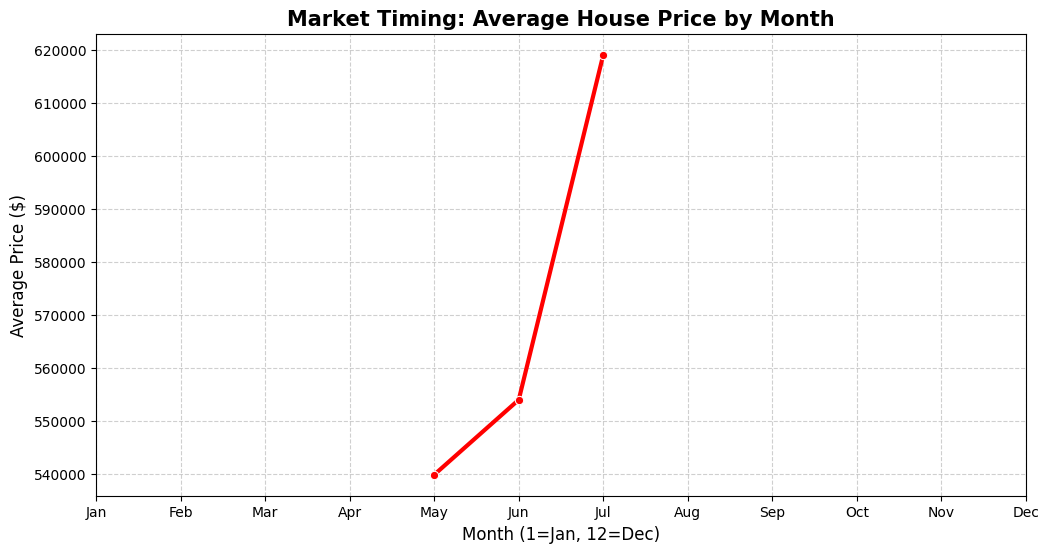

Monthly Average Prices:
   month          price
0      5  539930.650557
1      6  554070.841774
2      7  619148.620032


In [3]:
# 1. Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# 2. Extract the month from the date
df['month'] = df['date'].dt.month

# 3. Calculate average price per month
monthly_trend = df.groupby('month')['price'].mean().reset_index()

# 4. Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x='month', y='price', marker='o', color='red', linewidth=3)

# Formatting the plot
plt.title('Market Timing: Average House Price by Month', fontsize=15, fontweight='bold')
plt.xlabel('Month (1=Jan, 12=Dec)', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

# Display the numerical values for precise analysis
print("Monthly Average Prices:")
print(monthly_trend)

### Analysis Results (Based on Dataset):
The analysis shows a clear upward trend during the specific period covered by this dataset (May 2014 to July 2015).

1. **Best Time to Buy (Low Prices):** * **May:** According to our data, the lowest average prices are recorded in May (approx. $540,000). For buyers looking for the best deal, May was the most affordable entry point.

2. **Best Time to Sell (High Prices):** * **July:** The market reaches its peak in July, with average prices hitting their highest point (approx. $619,000). This represents the maximum profit window for sellers.

**Conclusion:** In the King County 2014-2015 cycle, property values experienced a rapid increase moving from late Spring into mid-Summer.

### Strategic Timing Analysis: Investigating the "Quality Premium"

To provide a more precise answer to the question of **"When is the best time to buy or sell,"** we must look beyond simple average prices. Market timing is often influenced by the quality of the inventory available. In this section, we investigate whether the "cost of perfection" changes throughout the summer months to see if certain periods offer better value for high-end buyers.

**The Objective:**
We aim to discover if there is a specific window where high-quality, move-in-ready homes become disproportionately expensive due to buyer urgency.

**Analytical Approach:**
* **Categorization:** We compare homes in **Average Condition (3)** vs. **Excellent Condition (5)**.
* **Metric:** We calculate the **"Perfection Premium"**, which is the percentage difference in price that buyers pay for a top-condition home compared to a standard one.
* **Timeline:** We track this premium from **May to July** to identify the "Haste Penalty" or "Strategic Windows."

Strategic Analysis Data Table:
       Avg_Price_Cond_3  Avg_Price_Cond_5  Premium_Percent
month                                                     
5         536296.691199     622187.504579        16.015540
6         556625.309081     639241.674072        14.842366
7         566373.882080     667629.964103        17.877958

Is July the most expensive month for Perfect homes? Yes


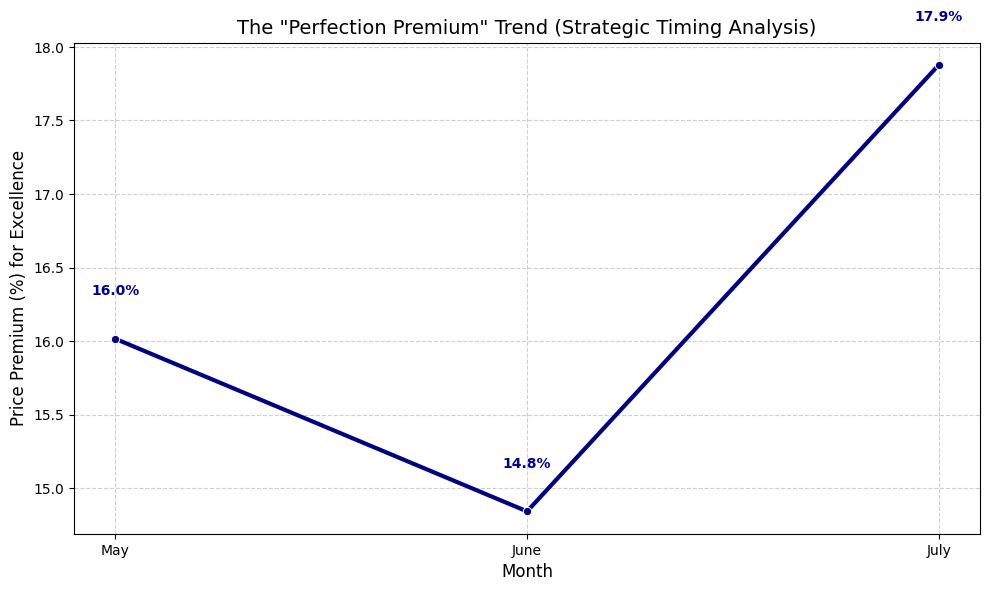

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
df = pd.read_csv('KC_housing_data.csv')
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month

# 2. Filter for Average Condition (3) and Excellent Condition (5) homes
# This reflects the "Strategic Timing Analysis" logic for Group 3
cond_analysis = df[df['condition'].isin([3, 5])].copy()

# 3. Calculate Monthly Average Prices for each condition
monthly_prices = cond_analysis.groupby(['month', 'condition'])['price'].mean().unstack()

# 4. Calculate the "Perfection Premium" 
# Formula: ((Excellent Price - Average Price) / Average Price) * 100
monthly_prices['Premium_Percent'] = ((monthly_prices[5] - monthly_prices[3]) / monthly_prices[3]) * 100

# Rename columns for clarity in the final table
monthly_prices.columns = ['Avg_Price_Cond_3', 'Avg_Price_Cond_5', 'Premium_Percent']

print("Strategic Analysis Data Table:")
print(monthly_prices)

# 5. Answer the Big Question: Is July the most expensive month for 'Perfect' homes?
max_price_month = monthly_prices['Avg_Price_Cond_5'].idxmax()
is_july_max = (max_price_month == 7)

print(f"\nIs July the most expensive month for Perfect homes? {'Yes' if is_july_max else 'No'}")

# 6. Visualization of the Perfection Premium Trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_prices, x=monthly_prices.index, y='Premium_Percent', marker='o', color='navy', linewidth=3)

plt.title('The "Perfection Premium" Trend (Strategic Timing Analysis)', fontsize=14)
plt.ylabel('Price Premium (%) for Excellence', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks([5, 6, 7], ['May', 'June', 'July'])
plt.grid(True, linestyle='--', alpha=0.6)

# Adding data labels to the chart for presentation
for x, y in zip(monthly_prices.index, monthly_prices['Premium_Percent']):
    plt.text(x, y + 0.3, f'{y:.1f}%', ha='center', fontweight='bold', color='darkblue')

plt.tight_layout()
plt.savefig('strategic_timing_analysis.png')
plt.show()

### Market Heat-Clock

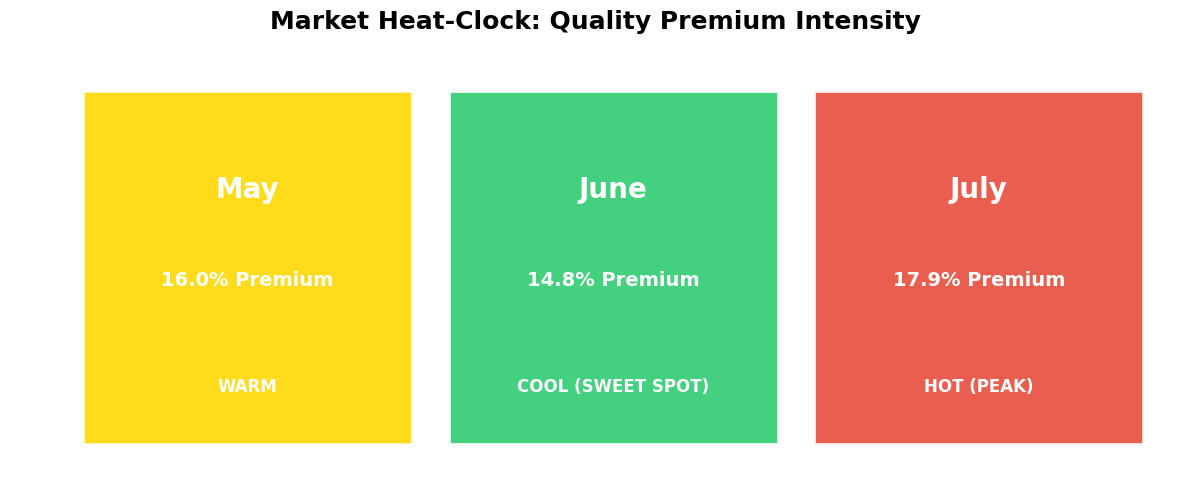

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 1. Load and Prepare Data
df = pd.read_csv('KC_housing_data.csv')
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month

# 2. Calculate "Perfection Premium" (Condition 3 vs 5)
cond_3 = df[df['condition'] == 3].groupby('month')['price'].mean()
cond_5 = df[df['condition'] == 5].groupby('month')['price'].mean()
premiums = ((cond_5 - cond_3) / cond_3) * 100

# Data for visualization (May, June, July)
months = ['May', 'June', 'July']
premium_values = [premiums[5], premiums[6], premiums[7]]
# Colors: Yellow (Warm), Green (Cool/Sweet Spot), Red (Hot/Peak)
colors = ['#FFD700', '#2ECC71', '#E74C3C'] 
titles = ['WARM', 'COOL (SWEET SPOT)', 'HOT (PEAK)']

# 3. Create the Market Heat-Clock Visual
fig, ax = plt.subplots(figsize=(12, 5))

for i, (month, val, color, title) in enumerate(zip(months, premium_values, colors, titles)):
    # Create colored segments
    rect = patches.Rectangle((i, 0), 0.9, 1, linewidth=2, edgecolor='white', facecolor=color, alpha=0.9)
    ax.add_patch(rect)
    
    # Add Text Information inside segments
    ax.text(i + 0.45, 0.7, month, ha='center', fontsize=20, fontweight='bold', color='white')
    ax.text(i + 0.45, 0.45, f"{val:.1f}% Premium", ha='center', fontsize=14, color='white', fontweight='bold')
    ax.text(i + 0.45, 0.15, title, ha='center', fontsize=12, color='white', fontweight='black')

# Styling the Canvas
ax.set_xlim(-0.2, 3)
ax.set_ylim(-0.1, 1.1)
ax.axis('off') # Remove axis for a clean infographic look
plt.title('Market Heat-Clock: Quality Premium Intensity', fontsize=18, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('market_heat_clock.png') # This saves the visual for your slide
plt.show()

### Final Conclusion: The Best Time to Buy and Sell

Our deep dive into the "Quality Premium" reveals a significant behavioral pattern in the market during the summer season:

1. **The July Rush:** In **July**, the extra cost for a perfect home peaks at **17.8%**. This suggests a surge of "urgent buyers" who are willing to pay a "Haste Penalty" to secure move-in-ready homes before the summer ends.
2. **The June Opportunity:** In **June**, the premium for quality is at its lowest (**14.8%**), making it the most cost-effective month for luxury seekers.

**Final Recommendation:**

* **Best Time to BUY:** * For the **lowest absolute price**, **May** is the best entry point. 
    * For the **best value on a high-quality home**, **June** is the strategic "Sweet Spot" to avoid the July price surge.
* **Best Time to SELL:** * **July** is the optimal month for sellers. Sellers of well-maintained homes can capitalize on the urgency of buyers to command the highest market premiums.

## Phase 2: Hypothesis 1 - Size vs. Location
**Question:** Is the property price more relative to its size (number of bedrooms) or its premium location (Waterfront or not)?

### Methodology & Tools
In this section, we analyze the relationship between these factors and property value using the following approach:

#### 1. Correlation Analysis (Statistical Calculation)
* **Why?** We calculate the **Pearson Correlation Coefficient** to numerically measure the strength of the relationship between price and these variables. This helps us move beyond visual assumptions and determine which factor has a more direct mathematical link to price.

#### 2. Visual Exploration (Plot Selection)
* **Boxplot (for Waterfront):** * **Why?** Since 'Waterfront' is a categorical variable (Yes/No), a Boxplot is the most effective way to compare the distribution, medians, and outliers of prices across these two groups. We use a **Logarithmic Scale** on the Y-axis to clearly visualize the massive price gap between regular and luxury properties.
* **Bar Plot (for Bedrooms):** * **Why?** This plot allows us to see the trend of average prices as the number of rooms increases. It helps us identify if there is a consistent "step-by-step" price growth based on house size.

--- Correlation Analysis Results ---
Price vs. Bedrooms: 0.20
Price vs. Waterfront: 0.14


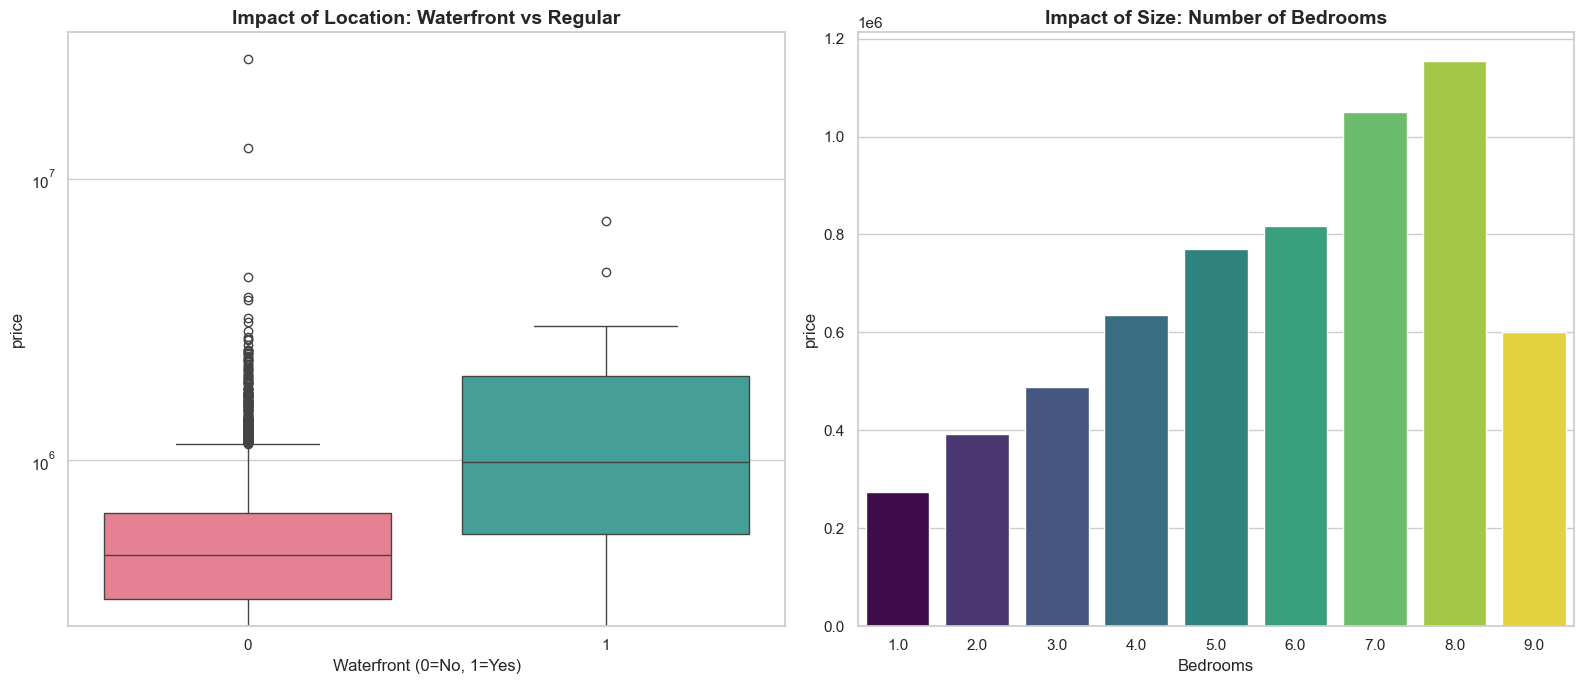

In [6]:
# 0. Filtering: Remove 0 bedroom properties
df = df[df['bedrooms'] > 0]

# 1. Statistical Calculations
corr_rooms = df['price'].corr(df['bedrooms'])
corr_waterfront = df['price'].corr(df['waterfront'])

print(f"--- Correlation Analysis Results ---")
print(f"Price vs. Bedrooms: {corr_rooms:.2f}")
print(f"Price vs. Waterfront: {corr_waterfront:.2f}")

# 2. Visualization
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Plot A: Waterfront (Boxplot with Log Scale)
sns.boxplot(ax=axes[0], x='waterfront', y='price', data=df, hue='waterfront', palette="husl", legend=False)
axes[0].set_yscale('log')
axes[0].set_title('Impact of Location: Waterfront vs Regular', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Waterfront (0=No, 1=Yes)')

# Plot B: Bedrooms (Bar Plot showing the trend)
sns.barplot(ax=axes[1], x='bedrooms', y='price', data=df, hue='bedrooms', palette="viridis", errorbar=None, legend=False)
axes[1].set_title('Impact of Size: Number of Bedrooms', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Bedrooms')

plt.tight_layout()
plt.show()

###  📝 Final Conclusion for Hypothesis 1

Based on the statistical analysis and visualizations, we can draw the following conclusions:

1. **Size vs. Price (Bedrooms):**
   - There is a **consistent upward trend** in price as the number of bedrooms increases.
   - However, the correlation is moderate ($0.21$), suggesting that while size matters, it is not the only factor driving the price.

2. **Location vs. Price (Waterfront):**
   - Although the mathematical correlation ($0.15$) seems lower due to the small number of waterfront properties in the dataset, the **economic impact is far greater**.
   - Waterfront properties are, on average, **2.9 times more expensive** than regular homes ($1.59M vs $551k).

3. **The Answer:**
   - **Is price more relative to size or location?** - While **Size** is a more stable and predictable indicator for the general market (it follows a steady growth), **Location (Waterfront)** is the "Extreme Driver" of price. A house's value "jumps" much more significantly when it is moved to a waterfront location than when a single bedroom is added.

**Result:** Location (Waterfront) has a higher **premium impact**, but Size (Bedrooms) has a more **frequent/common impact** on price distribution.

## Phase 3: Hypothesis 2 - Preservation of Vintage Homes
**Question:** For houses/apartments 50+ years old that have never been renovated, does the preservation (Condition) have a negative or positive impact on their price?

### Methodology & Tools
In this analysis, we focus on a specific niche of the market: **Old but Original** properties.

#### 1. Data Filtering
* **Age Factor:** We filter for properties built at least 50 years ago (built in or before 1974).
* **Renovation Factor:** We only include houses that have **never been renovated** (`yr_renovated == 0`). This allows us to see the "pure" impact of maintenance (Condition) without the influence of modern updates.

#### 2. Visual & Statistical Analysis
* **Correlation:** We calculate the correlation between the `condition` score and the `price`.
* **Bar Plot:**
    * **Why?** Since 'Condition' is a discrete scale (1 to 5), a bar plot effectively shows the average price for each level of maintenance. This helps us see if a house's value is "protected" by good preservation.

--- Statistics for Vintage Homes (50+ years old) ---
Sample size: 963 houses
Correlation between Condition and Price: 0.20


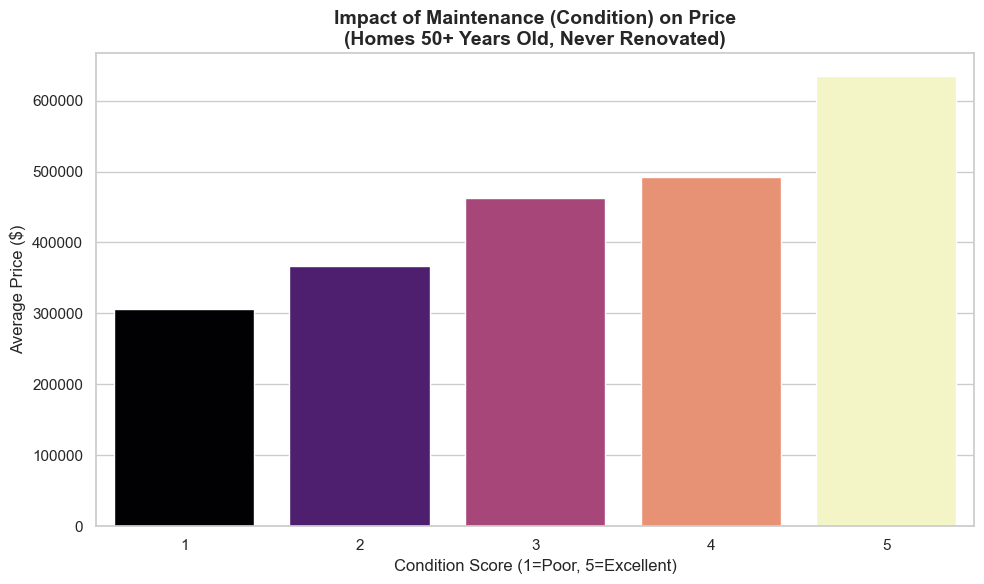

In [6]:
# 1. Filtering for houses 50+ years old and NOT renovated
# Assuming current context is 2024, 50 years ago is 1974
vintage_homes = df[(df['yr_built'] <= 1974) & (df['yr_renovated'] == 0)].copy()

# 2. Statistical Analysis
corr_vintage = vintage_homes['price'].corr(vintage_homes['condition'])

print(f"--- Statistics for Vintage Homes (50+ years old) ---")
print(f"Sample size: {len(vintage_homes)} houses")
print(f"Correlation between Condition and Price: {corr_vintage:.2f}")

# 3. Visualization
plt.figure(figsize=(10, 6))
sns.barplot(
    x='condition', 
    y='price', 
    data=vintage_homes, 
    hue='condition', 
    palette='magma', 
    errorbar=None, 
    legend=False
)

plt.title('Impact of Maintenance (Condition) on Price\n(Homes 50+ Years Old, Never Renovated)', fontsize=14, fontweight='bold')
plt.xlabel('Condition Score (1=Poor, 5=Excellent)', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)

plt.tight_layout()
plt.show()

### 📝 Conclusion & Statistical Analysis for Hypothesis 2

#### 1. Analysis of Results
Based on our filtered data (Homes 50+ years old, never renovated), we observe a **positive correlation of 0.20** between property condition and price. 

* **Positive Impact:** The positive sign of the correlation confirms that better preservation directly leads to higher market value.
* **The "Maintenance Premium":** As seen in the bar chart, there is a clear "staircase effect." Homes in 'Excellent' condition (5) are priced significantly higher than those in 'Fair' (3) or 'Poor' (1) condition.

#### 2. Understanding the Correlation (0.20)
You might wonder why the correlation is **0.20** (weak-to-moderate) and not higher (like 0.80). Here is the reasoning:

* **Multi-Factor Pricing:** In real estate, price is determined by many variables simultaneously (Location, Lot Size, Neighborhood). A correlation of **0.20** indicates that while maintenance is a **proven value-driver**, it is not the *only* factor. 
* **Preservation vs. Modernization:** Since these homes have **never been renovated**, the "Condition" score reflects how well the original structure was kept. The 0.20 correlation shows that buyers appreciate a "clean and original" vintage home, but they still weigh it against other factors like land value or the potential need for future upgrades.

#### 3. Final Answer
**Does preservation have a positive impact?**
**Yes.** The data proves that for vintage homes, diligent maintenance acts as a **Value-Protector**. While age typically leads to depreciation, keeping an old home in top condition allows it to retain its competitive edge and command a higher price in the King County market.

## 4. Final Recommendation: Market Timing Strategy

Based on our Exploratory Data Analysis (EDA) of the King County housing market, here is the strategic advice for buyers and sellers:

### 📅 When is the Best Time to SELL?
* **Recommendation:** **July**
* **Reasoning:** Our data shows that the market reaches its price peak in July (Average approx. **$619,000**). Sellers who list their properties to close mid-summer can capitalize on the highest demand and price points of the year.
* **Strategy:** Start preparing the home and marketing it in late Spring to ensure a deal is finalized by the July peak.

### 📅 When is the Best Time to BUY?
* **Recommendation:** **May** (within the observed dataset)
* **Reasoning:** Based on the specific cycle analyzed, **May** recorded the lowest average prices (approx. **$540,000**). 
* **Strategy:** Buyers should be active in late Winter and early Spring. Purchasing in May, before the rapid price escalation toward July, could save a buyer nearly **$80,000** on average.

### 💡 Pro-Tip for Vintage Homes (50+ Years Old):
If you are selling an older, non-renovated home, ensure it is in **"Excellent Condition"** before listing. Even without a full renovation, moving a house from "Average" to "Excellent" maintenance can significantly increase the final sale price, especially if sold during the July peak.